In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


Basic Data Analysis and Visualizations

In [2]:
train_df = pd.read_csv('/kaggle/input/titanic/train.csv')
test_df = pd.read_csv('/kaggle/input/titanic/test.csv')

In [3]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
print(train_df.shape,test_df.shape)

(891, 12) (418, 11)


61 percent people did not survive. Only 38 percent people survived.

<Axes: title={'center': 'Survival Distribution'}, ylabel='Survived'>

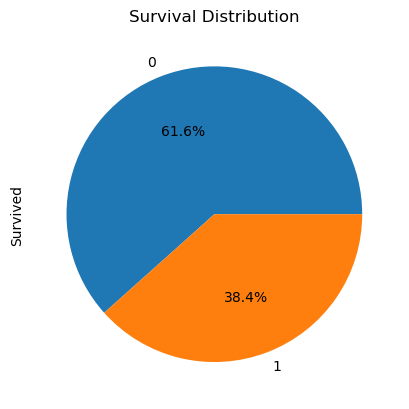

In [8]:
survived_df=train_df['Survived'].value_counts()
survived_df.plot(kind='pie',autopct='%1.1f%%',title='Survival Distribution')



In [9]:
train_df['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [10]:
import matplotlib.pyplot as plt

train_df.groupby('Pclass').count()
print(train_df[train_df['Survived']==1].groupby('Pclass')['Survived'].count())
print(train_df[train_df['Survived']==0].groupby('Pclass')['Survived'].count())
print(train_df.groupby('Pclass')['Survived'].mean()*100)

Pclass
1    136
2     87
3    119
Name: Survived, dtype: int64
Pclass
1     80
2     97
3    372
Name: Survived, dtype: int64
Pclass
1    62.962963
2    47.282609
3    24.236253
Name: Survived, dtype: float64


Observation:
62 percent who travelled in first class survived.
47 percent who travelled in second class survived.
24 percent who travelled in third class survived.


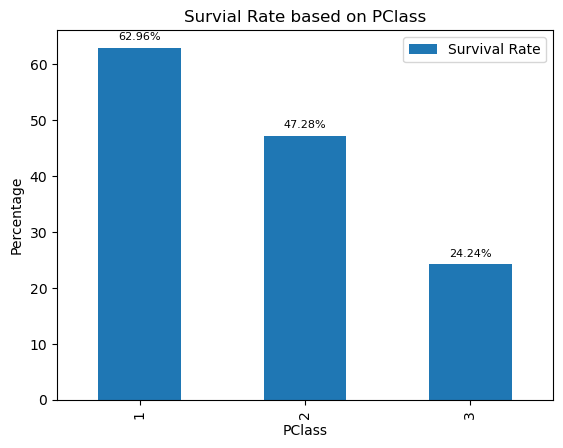

In [11]:
pclass_df = train_df.groupby('Pclass')['Survived'].mean()*100
ax=pclass_df.plot(x='Pclass',kind='bar')
for i, v in enumerate(pclass_df):
    ax.text(i, v + 1, f"{v:.2f}%", ha='center', va='bottom', fontsize=8)

plt.xlabel("PClass")
plt.ylabel("Percentage")
plt.title("Survial Rate based on PClass")
plt.legend(["Survival Rate"])

In [12]:
print(train_df.groupby('Sex')['Survived'].mean())
print(train_df.groupby('Sex')['Survived'].count())
print(train_df.groupby('Sex')['Survived'].sum())

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64
Sex
female    314
male      577
Name: Survived, dtype: int64
Sex
female    233
male      109
Name: Survived, dtype: int64


Out of 314 female passengers, 233 female passengers survived(74 percent).
Out of 577 male passengers, only 109 male passengers survived(19 percent).

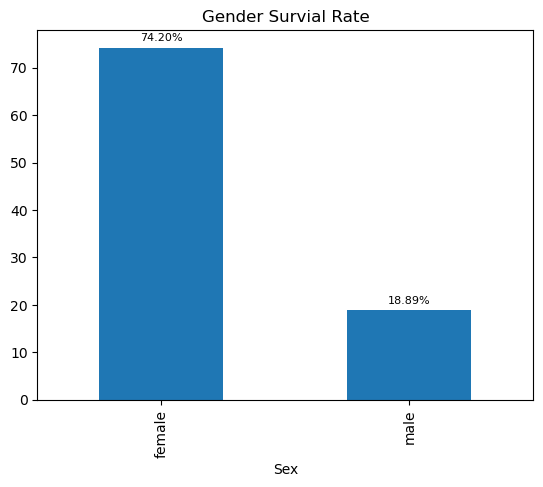

In [13]:
sex_df = train_df.groupby('Sex')['Survived'].mean()*100
ax=sex_df.plot(x="Sex",kind='bar')
for i, v in enumerate(sex_df):
    ax.text(i, v + 1, f"{v:.2f}%", ha='center', va='bottom', fontsize=8)
plt.title("Gender Survial Rate")
plt.show()



**Female who travelled by 1st class** survived the most.
Male who travelled by 3rd class survived the least.

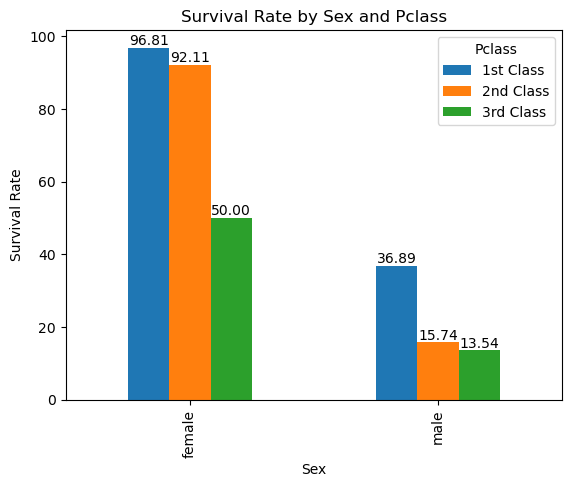

In [14]:
spclass_df = train_df.groupby(['Sex','Pclass'])['Survived'].mean()*100
pivot_table = spclass_df.unstack()
ax = pivot_table.plot(kind='bar')
plt.xlabel('Sex')
plt.ylabel('Survival Rate')
plt.title('Survival Rate by Sex and Pclass')

# Set the legend
plt.legend(title='Pclass', labels=['1st Class', '2nd Class', '3rd Class'])

for column in pivot_table.columns:
    ax.bar_label(ax.containers[pivot_table.columns.get_loc(column)], fmt='%.2f', label_type='edge')
# Show the plot
plt.show()

Passengers who travelled with their Family(Siblings/Spouse, with Parents or Kids). 

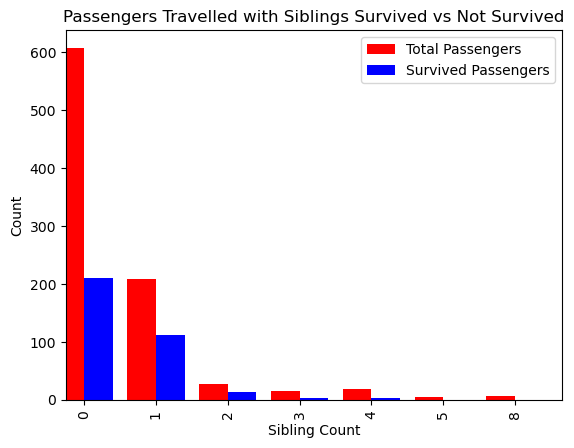

In [15]:
sibtot_df = train_df.groupby('SibSp')['Survived'].count()
sibsur_df = train_df.groupby('SibSp')['Survived'].sum()

fig, ax = plt.subplots()

# Plotting the first bar plot
sibtot_df.plot(x='Sibling Count', kind='bar', ax=ax, position=1, width=0.4, label='Total Passengers',color='red')

# Plotting the second bar plot
sibsur_df.plot(x='Sibling Count', kind='bar', ax=ax, position=0, width=0.4, label='Survived Passengers',color='blue')


ax.set_xlabel("Sibling Count")
ax.set_ylabel("Count")
ax.set_title("Passengers Travelled with Siblings Survived vs Not Survived")
ax.legend()

plt.show()

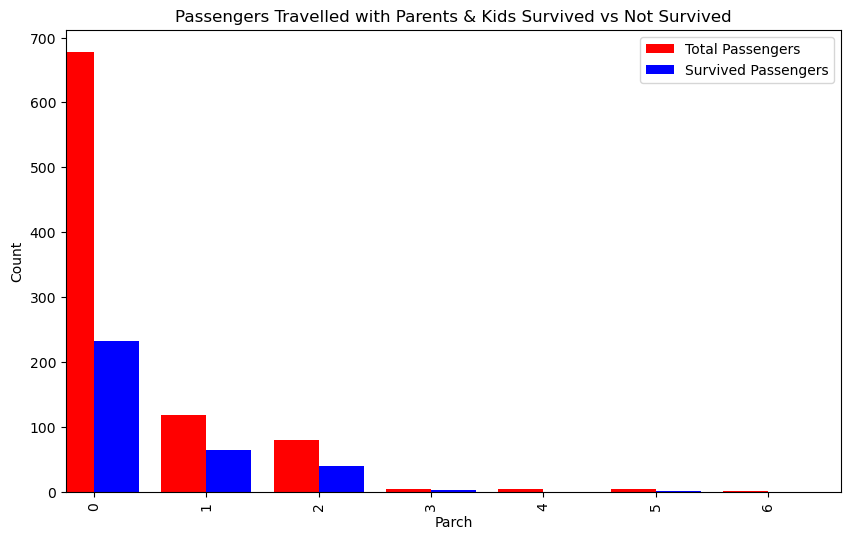

In [16]:
partot_df = train_df.groupby('Parch')['Survived'].count()
parsur_df = train_df.groupby('Parch')['Survived'].sum()

fig, ax = plt.subplots(figsize=(10,6))

# Plotting the first bar plot
partot_df.plot(x='Parch', kind='bar', ax=ax, position=1, width=0.4, label='Total Passengers',color='red')

# Plotting the second bar plot
parsur_df.plot(x='Parch', kind='bar', ax=ax, position=0, width=0.4, label='Survived Passengers',color='blue')


ax.set_xlabel("Parch")
ax.set_ylabel("Count")
ax.set_title("Passengers Travelled with Parents & Kids Survived vs Not Survived")
ax.legend()

plt.show()

The Passengers count is skewed between 20 to 40

<Axes: ylabel='Frequency'>

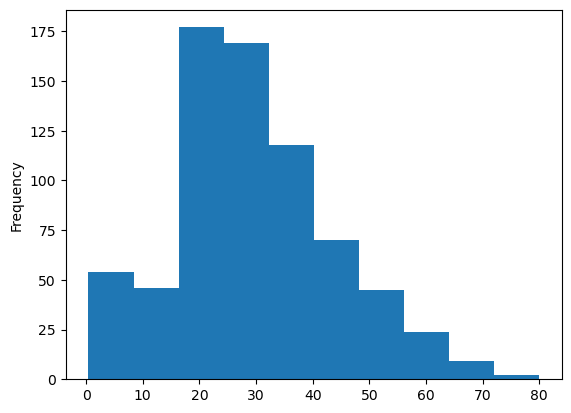

In [17]:
train_df['Age'].plot(kind='hist')

In [18]:
age_df = train_df.groupby('Age')['Survived'].mean()
age_df = age_df.reset_index(name='Survived')



Survival Rate based on the Age Group****

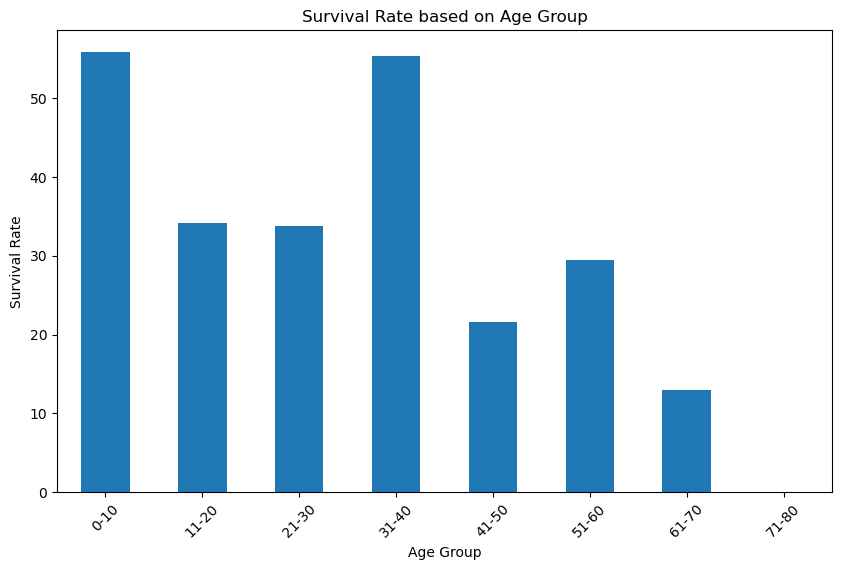

In [19]:
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80]

# Assign labels to age bins
age_labels = ['0-10', '11-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80']

# Group by age bins and calculate mean survival rate
age_df['AgeGroup'] = pd.cut(train_df['Age'], bins=bins, labels=age_labels, right=False)
age_grouped = age_df.groupby('AgeGroup')['Survived'].mean()*100

plt.figure(figsize=(10, 6))  # Adjust figsize as needed
age_grouped.plot(kind='bar')
plt.xlabel("Age Group")
plt.ylabel("Survival Rate")
plt.title("Survival Rate based on Age Group")
plt.xticks(rotation=45)
plt.show()

Fare Distributin and its Relation with Survival. 
The people who paid the most, survived.

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


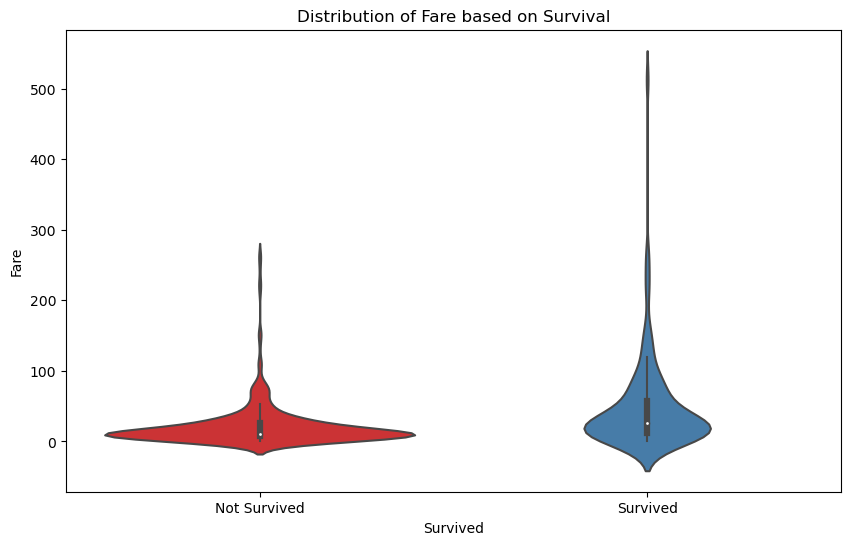

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))  # Adjust figsize as needed

sns.violinplot(x=train_df['Survived'], y=train_df['Fare'], palette='Set1')
plt.xlabel("Survived")
plt.ylabel("Fare")
plt.title("Distribution of Fare based on Survival")
plt.xticks([0, 1], ['Not Survived', 'Survived'])

plt.show()


/tmp/ipykernel_20/1342839968.py:6: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.swarmplot(x=train_df['Survived'], y=train_df['Fare'], palette='Set1', alpha=0.7)
/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 42.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 9.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 57.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 24.9% of the points cannot be placed; you may want to decrease

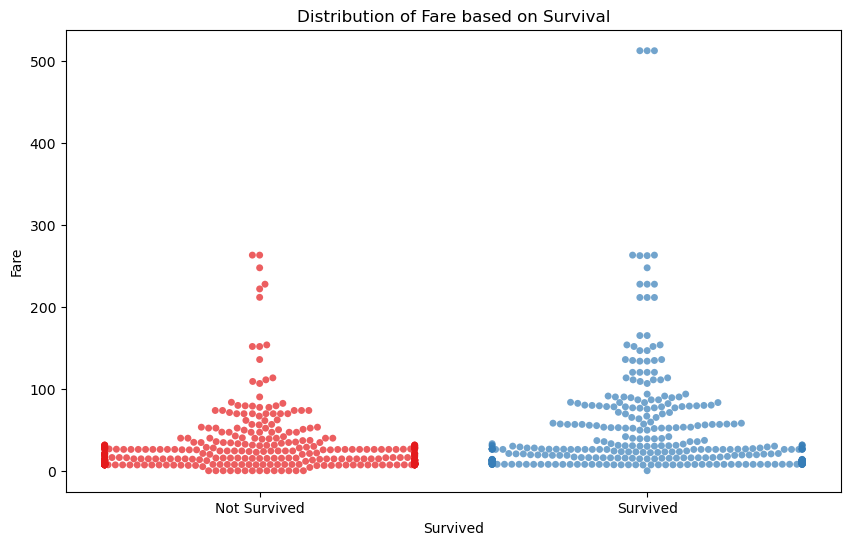

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))  # Adjust figsize as needed

sns.swarmplot(x=train_df['Survived'], y=train_df['Fare'], palette='Set1', alpha=0.7)
plt.xlabel("Survived")
plt.ylabel("Fare")
plt.title("Distribution of Fare based on Survival")
plt.xticks([0, 1], ['Not Survived', 'Survived'])

plt.show()

Passengers who embarked from 'S' Port has good survival Rate.****

/tmp/ipykernel_20/3996486845.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.pointplot(x='Embarked', y='Survived', data=train_df, ci='sd', palette='Set1')


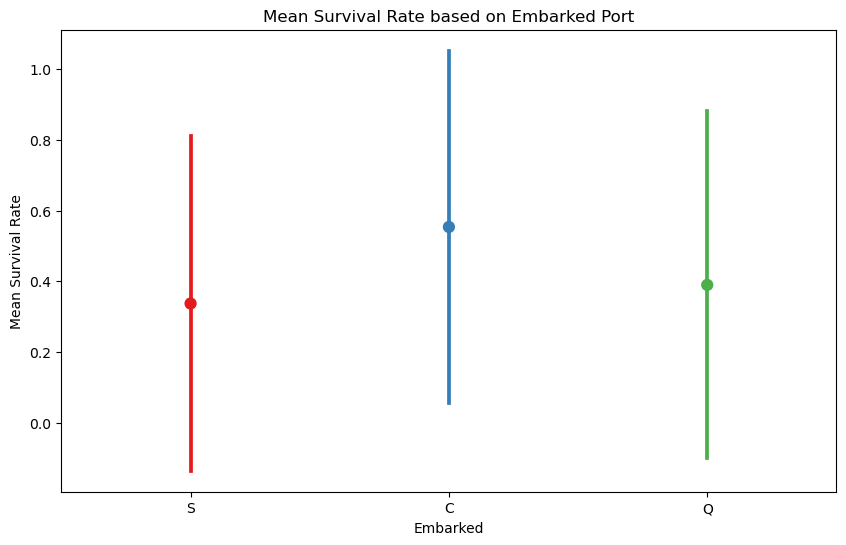

In [22]:
plt.figure(figsize=(10, 6))  # Adjust figsize as needed

sns.pointplot(x='Embarked', y='Survived', data=train_df, ci='sd', palette='Set1')
plt.xlabel("Embarked")
plt.ylabel("Mean Survival Rate")
plt.title("Mean Survival Rate based on Embarked Port")


plt.show()

Sex     Embarked
female  C           87.671233
        Q           75.000000
        S           68.965517
male    C           30.526316
        Q            7.317073
        S           17.460317
Name: Survived, dtype: float64


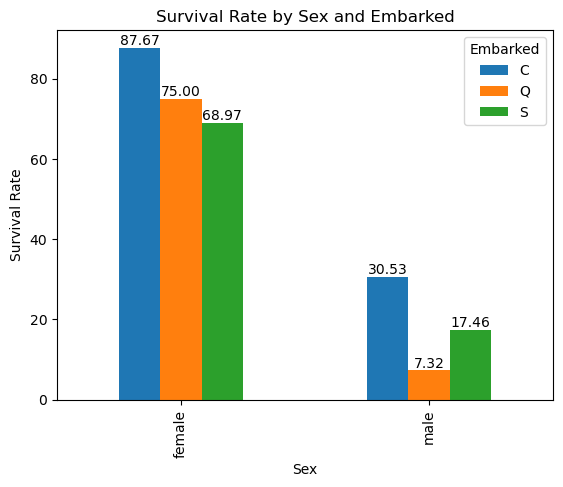

In [23]:
semba_df = train_df.groupby(['Sex','Embarked'])['Survived'].mean()*100
print(semba_df)
pivot_table = semba_df.unstack()
ax = pivot_table.plot(kind='bar')
plt.xlabel('Sex')
plt.ylabel('Survival Rate')
plt.title('Survival Rate by Sex and Embarked')

# Set the legend
plt.legend(title='Embarked', labels=['C', 'Q', 'S'])

for column in pivot_table.columns:
    ax.bar_label(ax.containers[pivot_table.columns.get_loc(column)], fmt='%.2f', label_type='edge')
# Show the plot
plt.show()

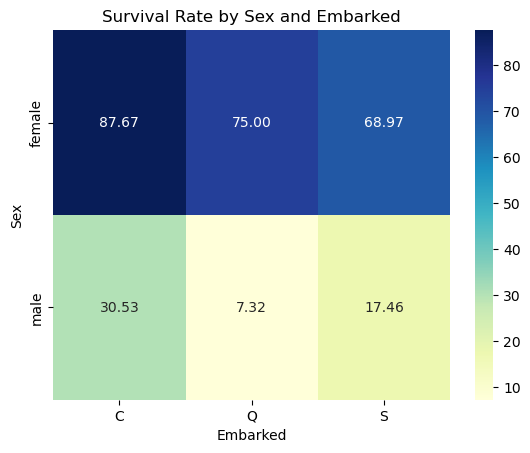

In [24]:
sns.heatmap(pivot_table, annot=True, cmap='YlGnBu', fmt=".2f")

plt.xlabel('Embarked')
plt.ylabel('Sex')
plt.title('Survival Rate by Sex and Embarked')

plt.show()

In [25]:
train_df.corr()

/tmp/ipykernel_20/1233823885.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  train_df.corr()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


Data Wrangling

Age column has more number of missing values. 
Embarked from train data set and Fare from test data set has missing values.

In [26]:
print(train_df.isnull().sum())
print(test_df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


Handled the missing value in Embarked with the most occurant value'S'.

In [27]:
# Fill missing values in the 'Embarked' column with 'S'
train_df['Embarked'] = train_df['Embarked'].fillna('S')


Name field has an inital 'Mr' or 'Mrs" or 'Miss' or 'Ms' or 'Master' or 'Dr' associated to it. Let us group by initals to see the average age for each category and assign that to the missing values.

In [28]:

def extract_title(name):
    return name.split(', ')[1].split('.')[0]

# Apply the function to create the 'name1' column
train_df['name1'] = train_df['Name'].apply(extract_title)


train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,name1
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


In [29]:
train_df['Age'].isnull().sum()

177

In [30]:
age_mapping = {
    'Mrs': 35.9,
    'Mr': 32.4,
    'Miss': 21.7,
    'Master': 4.6,
    'Dr':42.0
}

# Update missing values in the 'Age' column based on 'name1'
for name1, age in age_mapping.items():
    train_df.loc[(train_df['name1'] == name1) & (train_df['Age'].isnull()), 'Age'] = age

In [31]:
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
name1            0
dtype: int64

Updating the same for test data

In [32]:
def extract_title(name):
    return name.split(', ')[1].split('.')[0]

# Apply the function to create the 'name1' column
test_df['name1'] = test_df['Name'].apply(extract_title)
print(test_df.groupby('name1')['Age'].mean())

name1
Col       50.000000
Dona      39.000000
Dr        53.000000
Master     7.406471
Miss      21.774844
Mr        32.000000
Mrs       38.903226
Ms              NaN
Rev       35.500000
Name: Age, dtype: float64


In [33]:
age_mapping = {
    'Mrs': 38.9,
    'Mr': 32.0,
    'Ms': 28.0,
    'Miss': 21.7,
    'Master': 7.4,
    'Dr':53.0
}

# Update missing values in the 'Age' column based on 'name1'
for name1, age in age_mapping.items():
    test_df.loc[(test_df['name1'] == name1) & (test_df['Age'].isnull()), 'Age'] = age

Handling the missing value for Fare with the mean.

In [34]:
mean_fare = test_df['Fare'].mean()

test_df['Fare'] = test_df['Fare'].fillna(mean_fare)


We can ignore the missing value present in Cabin column as we will not use it further.

In [35]:
test_df.isnull().any()

PassengerId    False
Pclass         False
Name           False
Sex            False
Age            False
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked       False
name1          False
dtype: bool

Standardization anc Bin Creation for Fare Column as the standard deviation is high.
Also creating 5 bins will help the model to predict better. 
Fare values Bin
0 to 20 %    0
20 to 40 %   1
40 to 60 %   2
60 to 80 %   3
80 to 100%   4

In [36]:
train_df['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [37]:
mean_fare = train_df['Fare'].mean()
std_fare = train_df['Fare'].std()

train_df['Standardized_Fare'] = (train_df['Fare'] - mean_fare) / std_fare

In [38]:
num_bins = 5

# Create quantile-based bins
train_df['Fare_Bin'] = pd.qcut(train_df['Standardized_Fare'], q=num_bins, labels=False)
train_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,name1,Standardized_Fare,Fare_Bin
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,-0.502163,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,0.786404,4
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,-0.488580,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,0.420494,4
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,-0.486064,1
5,6,0,3,"Moran, Mr. James",male,32.4,0,0,330877,8.4583,NaN,Q,Mr,-0.477848,1
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,Mr,0.395591,4
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,Master,-0.223957,2
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,Mrs,-0.424018,2
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,Mrs,-0.042931,3


Adding a new column "Family". If the passenger had a sibling or spouse or kids or parents in the ship, Family column will be 1, else 0

In [39]:
train_df['Family'] = (train_df['Parch'] != 0) | (train_df['SibSp'] != 0)

# Convert boolean values to 1 and 0
train_df['Family'] = train_df['Family'].astype(int)

Converting the Categorical values into Numberical Values

In [40]:
train_df['Sex'].replace(['male','female'],[0,1],inplace=True)
train_df['Embarked'].replace({'S': 0, 'C': 1, 'Q': 2}, inplace=True)

In [41]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,name1,Standardized_Fare,Fare_Bin,Family
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,0,Mr,-0.502163,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,1,Mrs,0.786404,4,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,Miss,-0.488580,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,0,Mrs,0.420494,4,1
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,0,Mr,-0.486064,1,0


Updating the same for the Test Data Set

In [42]:
test_df['Sex'].replace(['male','female'],[0,1],inplace=True)
test_df['Embarked'].replace({'S': 0, 'C': 1, 'Q': 2}, inplace=True)

test_df['Family'] = (test_df['Parch'] != 0) | (test_df['SibSp'] != 0)

# Convert boolean values to 1 and 0
test_df['Family'] = test_df['Family'].astype(int)

mean_fare = test_df['Fare'].mean()
std_fare = test_df['Fare'].std()

test_df['Standardized_Fare'] = (test_df['Fare'] - mean_fare) / std_fare

num_bins = 5

# Create quantile-based bins
test_df['Fare_Bin'] = pd.qcut(test_df['Standardized_Fare'], q=num_bins, labels=False)
test_df.head(10)


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,name1,Family,Standardized_Fare,Fare_Bin
0,892,3,"Kelly, Mr. James",0,34.5,0,0,330911,7.8292,NaN,2,Mr,0,-0.497811,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,363272,7.0000,NaN,0,Mrs,1,-0.512660,0
2,894,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,240276,9.6875,NaN,2,Mr,0,-0.464532,1
3,895,3,"Wirz, Mr. Albert",0,27.0,0,0,315154,8.6625,NaN,0,Mr,0,-0.482888,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,3101298,12.2875,NaN,0,Mrs,1,-0.417971,2
5,897,3,"Svensson, Mr. Johan Cervin",0,14.0,0,0,7538,9.2250,NaN,0,Mr,0,-0.472814,1
6,898,3,"Connolly, Miss. Kate",1,30.0,0,0,330972,7.6292,NaN,2,Miss,0,-0.501392,0
7,899,2,"Caldwell, Mr. Albert Francis",0,26.0,1,1,248738,29.0000,NaN,0,Mr,1,-0.118681,3
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",1,18.0,0,0,2657,7.2292,NaN,1,Mrs,0,-0.508555,0
9,901,3,"Davies, Mr. John Samuel",0,21.0,2,0,A/4 48871,24.1500,NaN,0,Mr,1,-0.205535,3


Using the features "Pclass , Sex, Embarked, Fare_Bin, Family " for the model creation.

In [43]:
X=pd.DataFrame()
X_test = pd.DataFrame()
X=train_df[['Pclass','Sex','Age','Embarked','Fare_Bin','Family']]
Y=train_df['Survived']
X_Test = test_df[['Pclass','Sex','Age','Embarked','Fare_Bin','Family']]

Splitting the train data set to check the accuracy of multiple models

In [44]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [45]:
# Initialize the models
logreg_model = LogisticRegression()
decision_tree_model = DecisionTreeClassifier()
random_forest_model = RandomForestClassifier()

# Train the models
logreg_model.fit(X_train, y_train)
decision_tree_model.fit(X_train, y_train)
random_forest_model.fit(X_train, y_train)

RandomForestClassifier()

In [46]:
# Make predictions using the trained models
logreg_predictions = logreg_model.predict(X_test)
decision_tree_predictions = decision_tree_model.predict(X_test)
random_forest_predictions = random_forest_model.predict(X_test)

In [47]:
# Calculate accuracy scores
logreg_accuracy = accuracy_score(y_test, logreg_predictions)
decision_tree_accuracy = accuracy_score(y_test, decision_tree_predictions)
random_forest_accuracy = accuracy_score(y_test, random_forest_predictions)

# Print the accuracy scores
print("Logistic Regression Accuracy:", logreg_accuracy)
print("Decision Tree Accuracy:", decision_tree_accuracy)
print("Random Forest Accuracy:", random_forest_accuracy)

Logistic Regression Accuracy: 0.7988826815642458
Decision Tree Accuracy: 0.7653631284916201
Random Forest Accuracy: 0.8044692737430168


In [48]:
X=train_df[['Pclass','Sex','Age','Embarked','Fare_Bin','Family']]
Y=train_df['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.4, random_state=42)

logreg_model.fit(X_train, y_train)
decision_tree_model.fit(X_train, y_train)
random_forest_model.fit(X_train, y_train)

logreg_predictions = logreg_model.predict(X_test)
decision_tree_predictions = decision_tree_model.predict(X_test)
random_forest_predictions = random_forest_model.predict(X_test)

# Calculate accuracy scores
logreg_accuracy = accuracy_score(y_test, logreg_predictions)
decision_tree_accuracy = accuracy_score(y_test, decision_tree_predictions)
random_forest_accuracy = accuracy_score(y_test, random_forest_predictions)

# Print the accuracy scores
print("Logistic Regression Accuracy:", logreg_accuracy)
print("Decision Tree Accuracy:", decision_tree_accuracy)
print("Random Forest Accuracy:", random_forest_accuracy)


Logistic Regression Accuracy: 0.7843137254901961
Decision Tree Accuracy: 0.7591036414565826
Random Forest Accuracy: 0.7871148459383753


Random Forest Model has good accuracy and so proceeding with Random Forest

In [49]:
model = RandomForestClassifier()
model.fit(X,Y)
pred_surv = model.predict(X_Test)


In [50]:
pred_surv

array([0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,

In [51]:
output = pd.DataFrame({'PassengerId': test_df.PassengerId, 'Survived': pred_surv})
output.to_csv('submission.csv', index=False)